In [1]:
!pip install mne

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.3 MB 9.9 MB/s eta 0:00:01
   -- ------------------------------------- 0.5/8.3 MB 6.6 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/8.3 MB 7.4 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/8.3 MB 8.3 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.3 MB 8.8 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.3 MB 9.3 MB/s eta 0:00:01
   -------------- ------------------------- 3.0/8.3 MB 10.0 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.3 MB 9.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.3 MB 9.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.3 MB 9.9 MB/s eta 0:00:01
   ----------------- ---------------------- 3.5/8.3 MB 7.2 MB/s eta 0:00:01
   ----------------- ---------------------- 3.7/8.3 MB 7.4 MB/s eta 0:00:01
   ---------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Dataset Exploration

In [2]:
import mne
# Replace 'your_file.gdf' with the path to your BCI IV 2a dataset file
file_path = 'BCICIV_2a_gdf\A01T.gdf'
# Load the dataset
raw = mne.io.read_raw_gdf(file_path)
# Print some information about the loaded data
print(raw.info)


Extracting EDF parameters from c:\Users\jjaya\Desktop\Trojan USC\Course\CSCI 566 Deep Learning\Project\Project\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
 subject_info: 4 items (dict)
>


c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Using matplotlib as 2D backend.


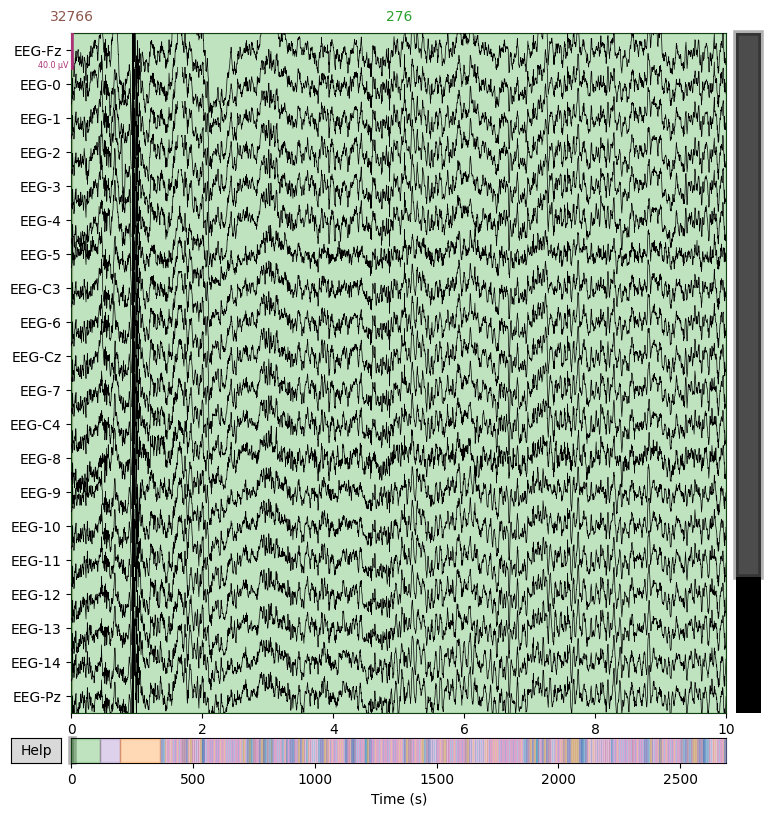

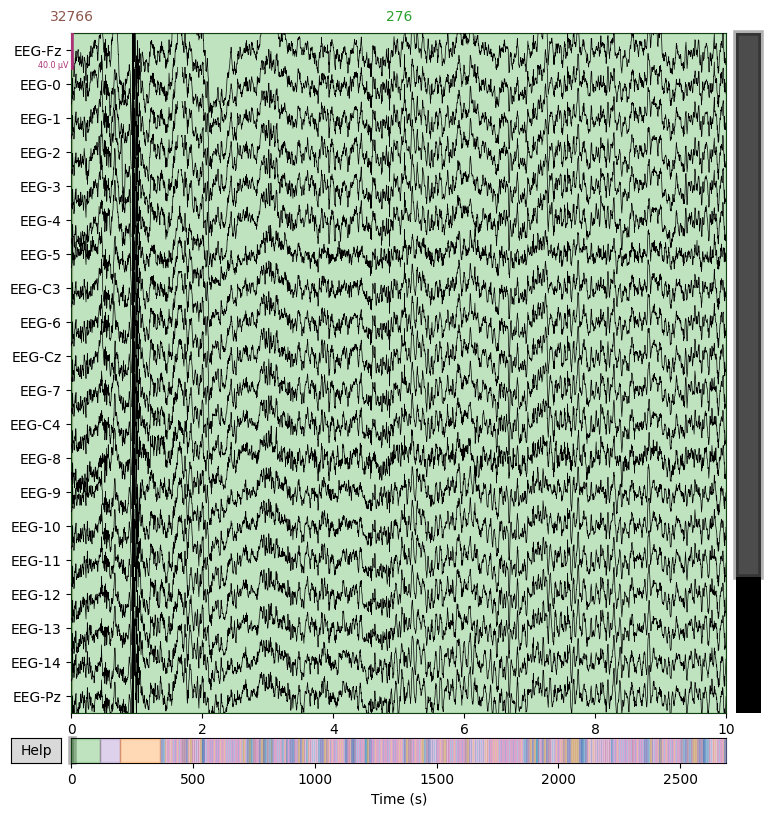

In [3]:
raw.plot()

In [4]:
channel_names = raw.ch_names
print(channel_names)

['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']


Effective window size : 8.192 (s)


C:\Users\jjaya\AppData\Local\Temp\ipykernel_14296\352401250.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
c:\Users\jjaya\miniconda3\envs\dsml\Lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


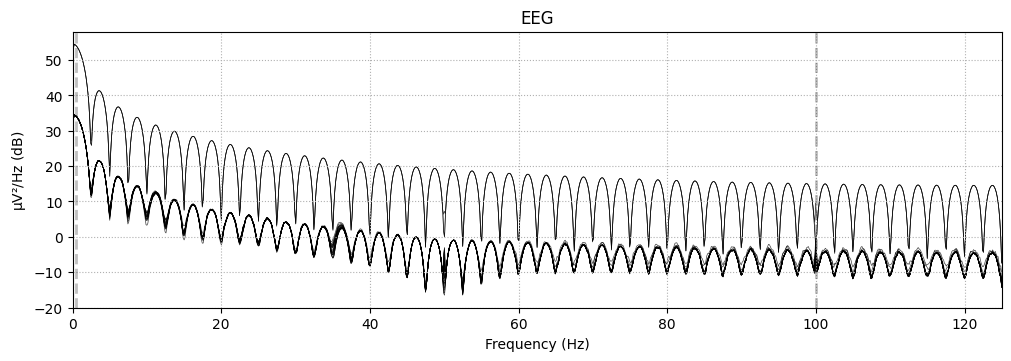

In [9]:
data, times = raw[:, :10]
channels_to_plot = ['EEG-Fz', 'EEG-Cz', 'EEG-C4']  # Example channels
raw.compute_psd().plot()  

Annotations represent the code for unique classes present in the dataset

In [12]:
# Convert annotations to events
events, event_dict = mne.events_from_annotations(raw)

# Print event IDs and counts
event_ids = set(events[:, 2])
print("Event IDs:", event_ids)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Event IDs: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


## Combined dataset loading

In [13]:
# List of GDF file paths
file_paths = ['BCICIV_2a_gdf/A01T.gdf', 'BCICIV_2a_gdf/A02T.gdf', 'BCICIV_2a_gdf/A03T.gdf', 'BCICIV_2a_gdf/A04T.gdf', 'BCICIV_2a_gdf/A05T.gdf', 'BCICIV_2a_gdf/A06T.gdf', 'BCICIV_2a_gdf/A07T.gdf', 'BCICIV_2a_gdf/A08T.gdf', 'BCICIV_2a_gdf/A09T.gdf']

# Create an empty list to store the loaded data
raws = []

# Iterate over each GDF file path
for file_path in file_paths:
    # Load the data from the GDF file
    raw = mne.io.read_raw_gdf(file_path)
    # Append the loaded data to the list
    raws.append(raw)

# Concatenate the loaded data into a single dataset
combined_raw = mne.concatenate_raws(raws)

# Print some information about the combined dataset
print(combined_raw.info)


Extracting EDF parameters from c:\Users\jjaya\Desktop\Trojan USC\Course\CSCI 566 Deep Learning\Project\Project\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Extracting EDF parameters from c:\Users\jjaya\Desktop\Trojan USC\Course\CSCI 566 Deep Learning\Project\Project\BCICIV_2a_gdf\A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Extracting EDF parameters from c:\Users\jjaya\Desktop\Trojan USC\Course\CS

c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from c:\Users\jjaya\Desktop\Trojan USC\Course\CSCI 566 Deep Learning\Project\Project\BCICIV_2a_gdf\A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Extracting EDF parameters from c:\Users\jjaya\Desktop\Trojan USC\Course\CSCI 566 Deep Learning\Project\Project\BCICIV_2a_gdf\A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Extracting EDF parameters from c:\Users\jjaya\Desktop\Trojan USC\Course\CS

c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<Info | 8 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
 subject_info: 4 items (dict)
>


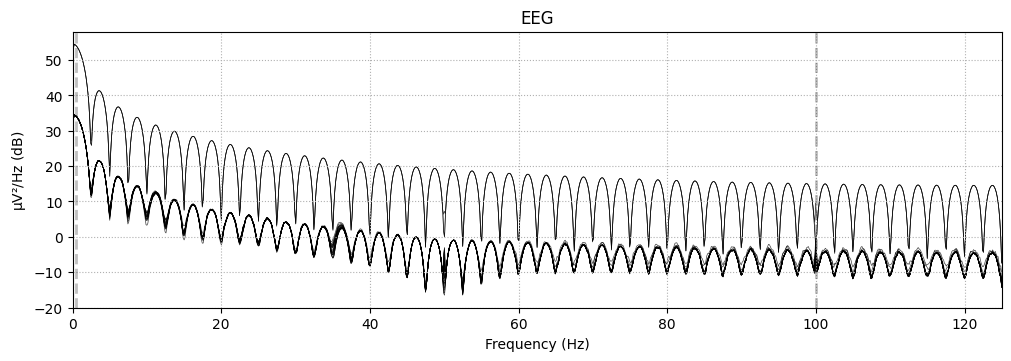

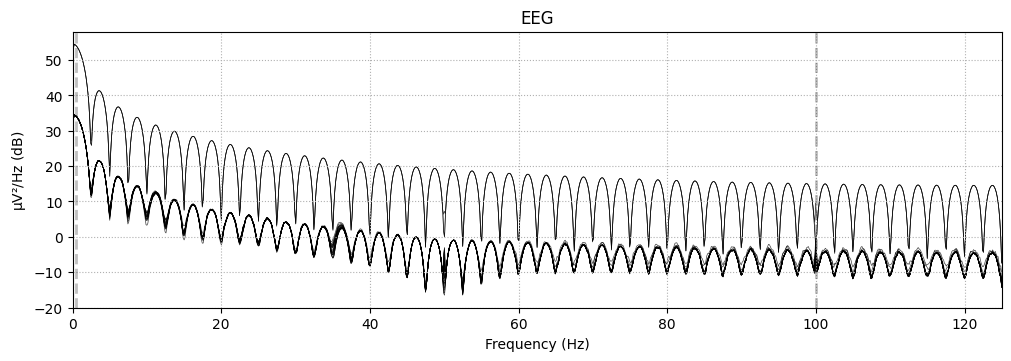

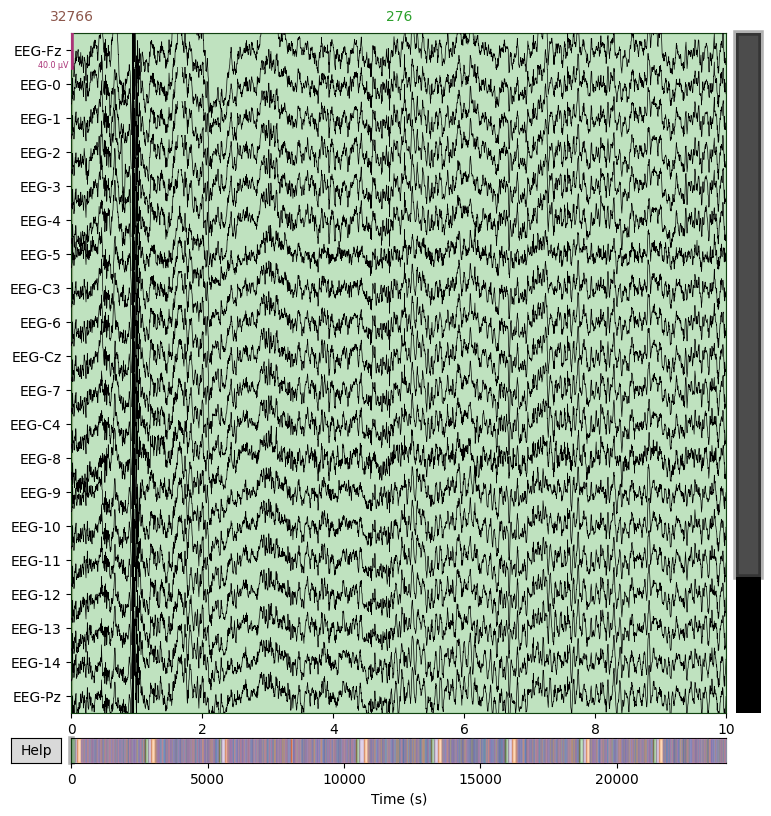

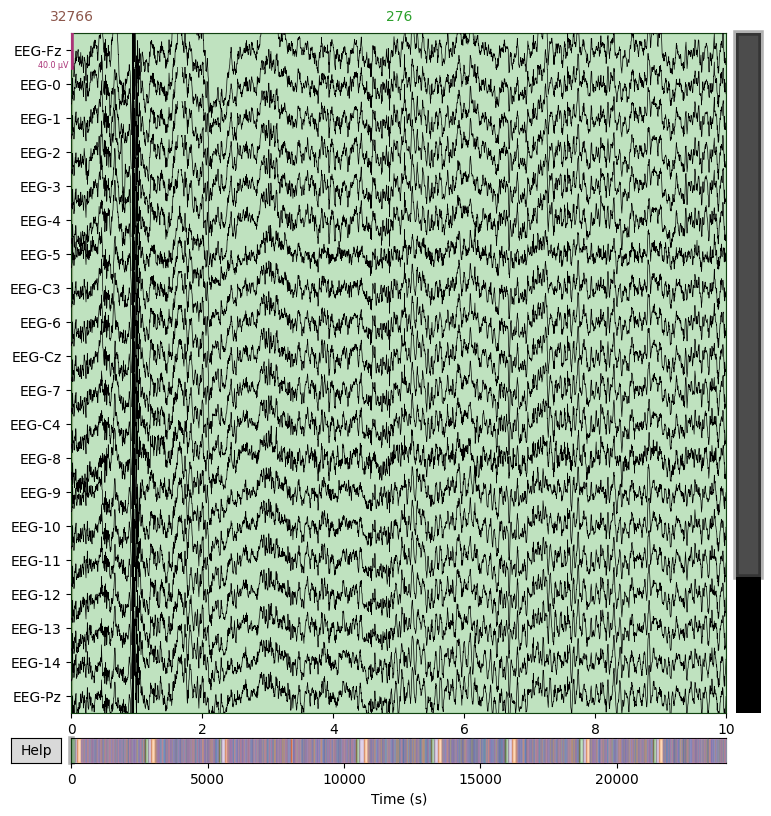

In [14]:
combined_raw.plot()


In [16]:
events, event_dict = mne.events_from_annotations(combined_raw)
event_ids = set(events[:, 2])
print("Event IDs:", event_ids)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Event IDs: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [18]:
event_dict

{'1023': 1,
 '1072': 2,
 '276': 3,
 '277': 4,
 '32766': 5,
 '768': 6,
 '769': 7,
 '770': 8,
 '771': 9,
 '772': 10}

## Split into train and test data

In [21]:
import os
import mne
from sklearn.model_selection import train_test_split

# Directory containing the dataset
dataset_dir = 'BCICIV_2a_gdf'

# List of participant IDs
participant_ids = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09']

# Define event IDs and their corresponding classes
event_classes = {
    1023: 'Class 1',
    1072: 'Class 2',
    276: 'Class 3',
    277: 'Class 4',
    32766: 'Class 5',
    768: 'Class 6',
    7: 'Class 7',
    8: 'Class 8',
    9: 'Class 9',
    10: 'Class 10'
}

# Load and split data for each participant
for participant_id in participant_ids:
    # Load training data
    train_data = mne.io.read_raw_gdf(os.path.join(dataset_dir, f'{participant_id}T.gdf'))
    
    # Load evaluation data
    eval_data = mne.io.read_raw_gdf(os.path.join(dataset_dir, f'{participant_id}E.gdf'))
    
    # Extract events and their corresponding class labels
    train_events, _ = mne.events_from_annotations(train_data)
    train_labels = train_events[:, -1]
    
    # Map event IDs to class labels
    train_classes = [event_classes[event_id] for event_id in train_labels]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(train_data.get_data(), train_classes, test_size=0.2, random_state=42)
    
    # Perform any necessary preprocessing or feature extraction here
    
    # Train and evaluate your model using the training and testing data
    # Your machine learning or deep learning code would go here

loadding data for participant:  A01
Extracting EDF parameters from c:\Users\jjaya\Desktop\Trojan USC\Course\CSCI 566 Deep Learning\Project\Project\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Extracting EDF parameters from c:\Users\jjaya\Desktop\Trojan USC\Course\CSCI 566 Deep Learning\Project\Project\BCICIV_2a_gdf\A01E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']


ValueError: Found input variables with inconsistent numbers of samples: [25, 603]